## Marcin Świątkowski
# NLP Lab 'Named entity recognition'

### Zadanie 1, 2, i 3 zrobione

### Zadanie 4: posortować ustawy według rozmiaru i wziąć top 50

In [175]:
# !pip install -i https://pypi.clarin-pl.eu lpmn_client
# !pip install spacy

In [3]:
import glob
import os
import regex as re
from lpmn_client import download_file, upload_file
from lpmn_client import Task
from bs4 import BeautifulSoup
from spacy.tokenizer import Tokenizer
from spacy.lang.pl import Polish
from collections import defaultdict
import matplotlib.pyplot as plt

c:\Users\marti\Desktop\Studia WIET\neural_networks\NN_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
dir_name = 'C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/ustawy/'

In [11]:
list_of_files = filter( os.path.isfile,
                        glob.glob(dir_name + '*') )

In [12]:
list_of_files = sorted(list_of_files, key= lambda x: os.stat(x).st_size)

In [40]:
# sortujemy ustawy i bierzemy top 50:

sorted_bills = []
for elem in list_of_files:
    file_size = os.stat(elem).st_size
    # print(file_size, ' ---> ', elem)
    pattern = re.compile(r'(?<=\\)\w+')
    match = re.search(pattern, elem)
    output = match.group() + '.txt'
    # print(file_size, output)
    sorted_bills.append(output)
    # print(output)
    # sorted_bills.append(elem)

sorted_bills.reverse()
print(sorted_bills[:50])
top_sorted_bills = sorted_bills.copy()[:50]

['2000_696.txt', '1996_465.txt', '2001_627.txt', '1997_555.txt', '2002_1689.txt', '2000_1186.txt', '1998_1118.txt', '1997_117.txt', '2001_1070.txt', '2001_1368.txt', '1997_714.txt', '2001_499.txt', '2003_1750.txt', '2001_1545.txt', '2000_991.txt', '2001_1229.txt', '1994_195.txt', '2000_1268.txt', '2003_2277.txt', '1997_926.txt', '2000_1104.txt', '1997_553.txt', '2004_2065.txt', '2004_1693.txt', '2004_880.txt', '2004_177.txt', '2003_423.txt', '1997_349.txt', '2000_1315.txt', '1999_930.txt', '1994_591.txt', '2004_2533.txt', '1996_110.txt', '1997_557.txt', '1999_95.txt', '2001_1381.txt', '2000_136.txt', '1996_460.txt', '2001_1438.txt', '1996_561.txt', '2001_1188.txt', '2001_628.txt', '2001_475.txt', '2003_2256.txt', '1998_602.txt', '2001_906.txt', '2001_92.txt', '1996_496.txt', '1997_153.txt', '2001_1444.txt']


In [54]:
# Ładujemy wybrane ustawy:

top_bills_content = dict()

for bill_name in top_sorted_bills:
    # print(bill_name)
    with open(f'C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/ustawy/{bill_name}', 'r', encoding="utf-8") as ustawa:
        content = ustawa.read()
        # print(content)
        top_bills_content[bill_name] = content

In [58]:
# zapisujemy top 50 w oddzielnym folderze:

import shutil

for k in top_bills_content.keys():
    shutil.copyfile(f'C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/ustawy/{k}', f'C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/top_ustawy/{k}')

In [65]:
# lematyzujemy:

task = Task(lpmn='any2txt|morphoditasgjp')
task.email = "martinswiat@mail.com"

file_id = upload_file("C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/top_ustawy.zip")
output_file_id = task.run(file_id)
download_file(output_file_id, "out")

'out/6d66fa11-37e8-4565-8ff0-5e4fe5865840.zip'

### Zadanie 5: Wyszukujemy następujące po sobie słowa, które zaczynają się na wielką literę

In [72]:
# Ładujemy zlematyzowany tekst:

path = 'C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/lemmatized_top_bills'

os.chdir(path)

lemma_top_bills = dict() # słownik przechowujący zlematyzowane ustawy

for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        
        with open(file_path, 'r', encoding='utf-8') as f:
            output = f.read()
            lemma_top_bills[file] = output

In [170]:
# Wyciągamy zdania z ustaw:

lemma_bills_parsed = dict()

for billname, bill in lemma_top_bills.items():
    phrases = bill.split('<sentence')
    lemma_bills_parsed[billname] = []

    for phrase in phrases:
        phrase = phrase.split('\n')
        lemma_phrase = []
        capital = False
        
        for line in phrase:
            if '<orth>' in line:
                word = re.findall(r'<orth>(.*?)</orth>', line)
                # print(word[0])
                try:
                    if word[0][0].isupper() == True:
                        capital = True
                    else:
                        capital = False
                except IndexError:
                    continue
            if '<base>' in line:
                word = re.findall(r'<base>(.*?)</base>', line)
                word = word[0]
                # print(word)
                if capital == True:
                    word = word.capitalize()
                    # print(word)
                    # print(word)
                lemma_phrase.append(word)
        try:
            lemma_phrase[0] = lemma_phrase[0].lower() # usuwamy wielką literę z pierwszego słowa
        except IndexError:
            pass
        lemma_phrase = ' '.join(lemma_phrase)
        lemma_bills_parsed[billname].append(lemma_phrase)

In [ ]:
# Tokenizujemy:

token_bills = dict()

nlp = Polish()

for k in lemma_bills_parsed.keys():
    token_bills[k] = []
    for phrase in lemma_bills_parsed[k]:
        tokenized_bill = []
        # print(k)
        doc = nlp(phrase)
        for token in doc:
            tok = token.text
            # print(tok)
            
            tokenized_bill.append(tok)
            
        token_bills[k].append(tokenized_bill)

In [211]:
upper_bills = dict()

for k in token_bills.keys():
    upper_bills[k] = []
    for phrase in token_bills[k]:
        upper_phrase = []
        upper_expression = []
        
        # print(phrase)
        for word in phrase:
            # print(phrase.index(word))
            if phrase.index(word) != 0 and word[0].isupper():
                upper_expression.append(word)
            else:
                exp = ' '.join(upper_expression)
                if len(upper_expression) > 0:
                    upper_phrase.append(exp)
                upper_expression = []

        # print('Upper phrase - ', upper_phrase)
        if len(upper_phrase) > 1:
            upper_bills[k].append(upper_phrase)
                

In [212]:
# Wynik tokenizacji i łączenia słów na wielką literę dla jednej z ustaw:

upper_bills['top_ustawy%1994_195.txt']

[['Tytuł I Przepis', 'Artykuł'],
 ['Urząd Patentowy Rzeczpospolita Polski', 'Urząd Patentowy'],
 ['Rzeczpospolita Polski',
  'Rzeczpospolita Polski',
  'Konwencja',
  'Akt',
  'Konwencja'],
 ['Dziennik', 'Ustawa'],
 ['Urząd Patentowy', 'Prezes Urząd Patentowy'],
 ['Ii Wynalazek', 'Dział I Przepis', 'Artykuł'],
 ['Rzeczpospolita Polski', 'Urząd Patentowy'],
 ['Polska', 'Urząd Patentowy'],
 ['Polska',
  'Prezes Urząd Patentowy',
  'Dziennik Urzędowy Rzeczpospolita Polski',
  'Monitor Polski'],
 ['Konwencja', 'Urząd Patentowy'],
 ['Urząd Patentowy', 'Urząd Patentowy'],
 ['Ii Wynalazek', 'Rozdział', 'Wynalazek Artykuł'],
 ['Zgłoszenie', 'Artykuł'],
 ['Prezes Urząd Patentowy',
  'Dziennik Urzędowy Rzeczpospolita Polski',
  'Monitor Polski'],
 ['Rzeczpospolita Polski', 'Urząd Patentowy'],
 ['Rozpatrywać', 'Artykuł'],
 ['Patentowy', 'Urząd Patentowy'],
 ['Wynalazek', 'Artykuł'],
 ['Państwo', 'Szef Urząd Ochrona Państwo'],
 ['Urząd Patentowy', 'Skarb Państwo', 'Szef Urząd Ochrona Państwo'],
 [

### Zadanie 6: Obliczamy częstość wystąpień wyrażeń zaczynających się z wielkiej litery

In [215]:
expression_count = dict()

for k in upper_bills.keys():
    for phrase in upper_bills[k]:
        for expression in phrase:
            if expression in expression_count.keys():
                expression_count[expression] += 1
            else:
                expression_count[expression] = 1

In [229]:
sorted_bills_dict = dict(sorted(expression_count.items(), key=lambda item: item[1], reverse=True))
# sorted_bills_dict
sorted_bills_top = dict()
for k, v in sorted_bills_dict.items():
    if len(sorted_bills_top) != 50 and len(k) > 1: # tu bierzemy 50 pierwszych
        sorted_bills_top[k] = v

In [230]:
# Wyświetlamy top 50 wyników

sorted_bills_top

{'Numer': 3847,
 'Dziennik': 1430,
 'Artykuł': 1315,
 'Ustawa': 1085,
 'Rzeczpospolita Polski': 505,
 'Policja': 389,
 'Straż Graniczny': 273,
 'Prawo': 272,
 'Kodeks': 271,
 'Unia Europejski': 255,
 'Kasa Chory': 253,
 'Skarb Państwo': 223,
 'Państwowy Straż Pożarny': 189,
 'Rada Minister': 184,
 'Rada': 177,
 'Zmiana': 176,
 'Azot': 166,
 'Pozostały': 161,
 'Minister': 146,
 'Rozdział': 144,
 'Tkanina': 141,
 'Fundusz': 136,
 'Praca': 135,
 'Minister Obrona Narodowy': 135,
 'Zakład': 130,
 'Prezes Rada Minister': 128,
 'Urząd Ochrona Państwo': 128,
 'Efta': 114,
 'Nawóz': 111,
 'Prezes Urząd': 110,
 'Ii': 109,
 'Administracja': 107,
 'Europejski Obszar Gospodarczy': 106,
 'Europejski Porozumienie': 105,
 'Wolny Handel': 105,
 'Przepis': 100,
 'Minister Sprawiedliwość': 99,
 'Inspektor Nadzór Wewnętrzny': 95,
 'Maszyna': 94,
 'Minister Sprawa Wewnętrzny': 93,
 'Damski': 93,
 'Minister Finanse': 89,
 'Opieka Społeczny': 89,
 'Biuro': 89,
 'Szef Urząd Ochrona Państwo': 81,
 'Okręgowy Ko

### Zadanie 7: Zastosować algorytm NER do identyfikacji nazw w niezlematyzowanym korpusie

In [232]:
# Ładujemy niezlematyzowany korpus:

path = 'C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/top_ustawy/'
os.chdir(path)

top_corpus = dict()

for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        
        with open(file_path, 'r', encoding='utf-8') as f:
            output = f.read()
            top_corpus[file] = output

In [237]:
task = Task(lpmn='any2txt|morphoditasgjp|liner2({"model":"n82"})')
task.email = "martinswiat@mail.com"

file_id = upload_file("C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/top_ustawy.zip")
output_file_id = task.run(file_id)
download_file(output_file_id, "./out_ner")

'./out_ner/24db6b77-8765-4854-846f-c5b054305cee.zip'

In [4]:
# Ładujemy korpus po przepuszczeniu przez NER:

path = 'C:/Users/marti/Desktop/Studia WIET/Semestr zimowy 2022-23/NLP/LabyNLP/top_ustawy_NER/'
os.chdir(path)

top_corpus_NER = dict()

for file in os.listdir():
    file_path = f"{path}/{file}"
        
    with open(file_path, 'r', encoding='utf-8') as f:
        output = f.read()
        top_corpus_NER[file] = output

In [5]:
# Parsujemy interesujące nas wyrażenia:

NER_bills = dict()

for k in top_corpus_NER.keys():
    top_NER_lines = top_corpus_NER['top_ustawy%1994_195.txt'].split('<sentence')
    bill_expressions = []
    for sentence in top_NER_lines:
        # print(sentence)
        if '<ann chan' in sentence:
            # name_id = re.findall(r'\d</ann>', sentence)[0][0]
            # if int(name_id) != 0:
            token = re.findall(r'<tok>((.|\n)*?)</tok>', sentence)
            # print(token[0])
            expression = []
            for t in token:
                # print(t)
                name_id = re.findall(r'\d</ann>', t[0])[0][0]
                if int(name_id) != 0:
                    # print(t)
                    base = re.findall(r'<base>(.*?)</base>', t[0])
                    name_type = re.findall(r'ann chan="(.*?)"', t[0])
                    # print(base)
                    expression.append({base[0]: name_type})
                else:
                    if len(expression) > 0:
                        bill_expressions.append(expression)
                    # if len(expression) > 0:
                        # print('exp ----> ', expression)
                    expression = []
    NER_bills[k] = bill_expressions        
            
        
    

In [5]:
print(NER_bills.keys())

dict_keys(['top_ustawy%1994_195.txt', 'top_ustawy%1994_591.txt', 'top_ustawy%1996_110.txt', 'top_ustawy%1996_460.txt', 'top_ustawy%1996_465.txt', 'top_ustawy%1996_496.txt', 'top_ustawy%1996_561.txt', 'top_ustawy%1997_117.txt', 'top_ustawy%1997_153.txt', 'top_ustawy%1997_349.txt', 'top_ustawy%1997_553.txt', 'top_ustawy%1997_555.txt', 'top_ustawy%1997_557.txt', 'top_ustawy%1997_714.txt', 'top_ustawy%1997_926.txt', 'top_ustawy%1998_1118.txt', 'top_ustawy%1998_602.txt', 'top_ustawy%1999_930.txt', 'top_ustawy%1999_95.txt', 'top_ustawy%2000_1104.txt', 'top_ustawy%2000_1186.txt', 'top_ustawy%2000_1268.txt', 'top_ustawy%2000_1315.txt', 'top_ustawy%2000_136.txt', 'top_ustawy%2000_696.txt', 'top_ustawy%2000_991.txt', 'top_ustawy%2001_1070.txt', 'top_ustawy%2001_1188.txt', 'top_ustawy%2001_1229.txt', 'top_ustawy%2001_1368.txt', 'top_ustawy%2001_1381.txt', 'top_ustawy%2001_1438.txt', 'top_ustawy%2001_1444.txt', 'top_ustawy%2001_1545.txt', 'top_ustawy%2001_475.txt', 'top_ustawy%2001_499.txt', 'top_

### Zadanie 8: histogram

In [8]:
# Najpierw liczymy wystąpienia klas:

class_counter = dict()

for k in NER_bills.keys():
    # print(NER_bills[k])
    for expression in NER_bills[k]:
        # print(expression)
        for pair in expression:
            # print(pair)
            for value in pair.values():
                # print(value)
                if len(value) == 1:
                    if value[0] not in class_counter.keys():
                        class_counter[value[0]] = 1
                    else:
                        class_counter[value[0]] += 1
                else:
                    for elem in value:
                        if elem not in class_counter.keys():
                            class_counter[elem] = 1
                        else:
                            class_counter[elem] += 1

In [9]:
sorted_class_counter = dict(sorted(class_counter.items(), key=lambda item: item[1], reverse=True))
print(sorted_class_counter)

{'nam_org_institution': 41450, 'nam_loc_gpe_country': 7700, 'nam_pro_title_document': 5400, 'nam_pro_media_periodic': 3800, 'nam_adj_country': 450, 'nam_liv_person': 350, 'nam_org_organization': 250, 'nam_fac_goe': 150}


In [82]:
# Tworzymy słownik coarse typów (ręcznie, bo jest ich niedużo)

coarse_sorted_class_counter = {'nam_org': 41700, 'nam_loc': 7700, 'nam_pro': 9200, 'nam_adj': 450, 'nam_liv': 350, 'nam_fac': 150}

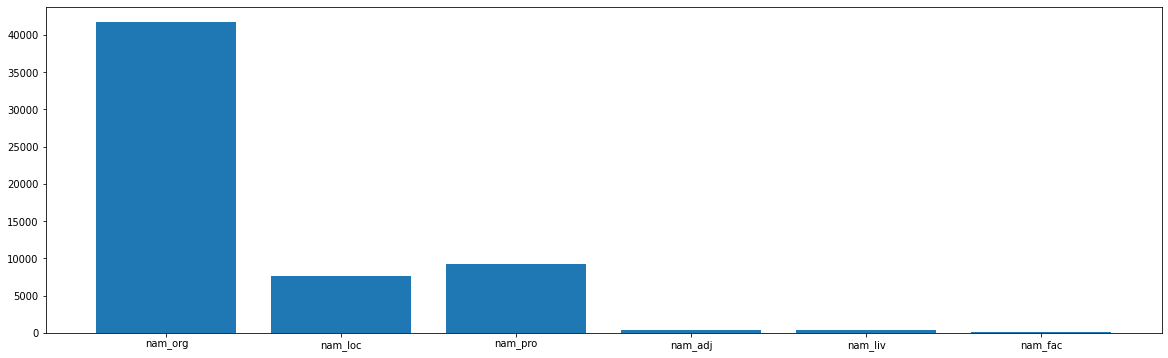

In [83]:
# Tworzymy histogram:

x = coarse_sorted_class_counter.keys()
y = coarse_sorted_class_counter.values()

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(x, y)
plt.show()

### Zadanie 9: 10 najczęściej występujących nazw dla każdego typu

In [10]:
name_by_class = dict()

for key in sorted_class_counter.keys():
    name_by_class[key] = []

name_by_class

{'nam_org_institution': [],
 'nam_loc_gpe_country': [],
 'nam_pro_title_document': [],
 'nam_pro_media_periodic': [],
 'nam_adj_country': [],
 'nam_liv_person': [],
 'nam_org_organization': [],
 'nam_fac_goe': []}

In [11]:
for k in NER_bills.keys():
    # print(NER_bills[k])
    for expression in NER_bills[k]:
        # print(expression)
        for pair in expression:
            # print(pair)
            for key, value in pair.items():
                if len(value) == 1:
                    name_by_class[value[0]].append(key)
                else:
                    for elem in value:
                        name_by_class[elem].append(key)

In [12]:
name_by_class_counter = dict()

for k, v in name_by_class.items():
    name_by_class_counter[k] = dict()
    # print(name_by_class_counter)
    for elem in v:
        if elem not in name_by_class_counter[k].keys():
            name_by_class_counter[k][elem] = 1
        else:
            name_by_class_counter[k][elem] += 1

In [2]:
text = 'nam_org_inst'
text[:7]

'nam_org'

In [13]:
coarse_class_counter = dict()

In [18]:
for k in name_by_class_counter.keys():
    if k[:7] not in coarse_class_counter.keys():
        coarse_class_counter[k[:7]] = name_by_class_counter[k]

In [20]:
coarse_class_counter

{'nam_org': {'urząd': 50,
  'patentowy': 50,
  'rzeczpospolita': 850,
  'polski': 950,
  'prezes': 2850,
  'Polska': 200,
  'konwencja': 100,
  'paryski': 100,
  'dziennik': 50,
  'urzędowy': 50,
  '&quot;': 200,
  'monitor': 50,
  'ochrona': 300,
  'państwo': 650,
  'skarb': 350,
  'szef': 200,
  'rada': 1000,
  'minister': 1050,
  'naczelny': 400,
  'sąd': 600,
  'administracyjny': 400,
  'prokurator': 250,
  'generalny': 250,
  'lub': 200,
  'izba': 550,
  'odwoławczy': 800,
  'oraz': 50,
  'rzecznik': 200,
  'prawo': 100,
  'obywatelski': 100,
  'VIII': 50,
  'Organa': 50,
  'dział': 50,
  'i': 150,
  'rozdział': 50,
  '1': 50,
  'zadanie': 50,
  'art': 50,
  'stać': 50,
  'interes': 150,
  'zawodowy': 150,
  'konstytucja': 50,
  'komisja': 350,
  'dyscyplinarny': 100,
  'ekspert': 100,
  'wysoki': 250,
  'wydział': 50,
  'sprawa': 50,
  'sporny': 50,
  'sprawiedliwość': 50,
  'pierwszy': 50,
  ',': 100,
  'ustawa': 150,
  'z': 50,
  'dzień': 50,
  '30': 50,
  'październik': 50,
  

### Zadanie 10: Wyświetlić 50 najpopularniejszych słów z ich liczebnością dla każdej klasy

In [61]:
sorted_name_by_class_counter = dict()

for k in name_by_class_counter.keys():
    sorted_name_by_class_counter[k] = dict(sorted(name_by_class_counter[k].items(), key=lambda item: item[1], reverse=True))

In [78]:
most_freq_names = dict()

for k in sorted_name_by_class_counter.keys():
    most_freq_names[k] = list(sorted_name_by_class_counter[k].items())[:50]

In [79]:
# Wreszcie wyświetlam 50 (o ile tyle jest) najpopularniejszych słów dla każdego typu

for k in most_freq_names.keys():
    print(k)
    print(most_freq_names[k])
    print()

nam_org_institution
[('urząd', 12700), ('patentowy', 12350), ('prezes', 2850), ('minister', 1050), ('rada', 1000), ('polski', 950), ('rzeczpospolita', 850), ('odwoławczy', 800), ('państwo', 650), ('sąd', 600), ('izba', 550), ('naczelny', 400), ('administracyjny', 400), ('skarb', 350), ('komisja', 350), ('ochrona', 300), ('wydział', 300), ('sprawa', 300), ('sporny', 300), ('prokurator', 250), ('generalny', 250), ('wysoki', 250), ('Polska', 200), ('&quot;', 200), ('szef', 200), ('lub', 200), ('rzecznik', 200), ('i', 150), ('interes', 150), ('zawodowy', 150), ('ustawa', 150), ('o', 150), ('konwencja', 100), ('paryski', 100), ('prawo', 100), ('obywatelski', 100), ('dyscyplinarny', 100), ('ekspert', 100), (',', 100), ('dziennik', 50), ('urzędowy', 50), ('monitor', 50), ('oraz', 50), ('VIII', 50), ('Organa', 50), ('dział', 50), ('rozdział', 50), ('1', 50), ('zadanie', 50), ('art', 50)]

nam_loc_gpe_country
[('polski', 1650), ('rzeczpospolita', 1450), ('urząd', 650), ('patentowy', 650), ('Pol

### Zadanie 12: Odpowiedź na pytania:

__Pytanie 1: Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?__

Według mnie lepiej poradził sobie NER. Liczenie słów z wielkimi literami, jakkolwiek szybkie i przejrzyste (o ile regexy są przejrzyste) ma takie wady, że wyłapywało również słowa, które nie znajdowały się na początku zdania, ale i nie były częściami żadnych nazw własnych. NER natomiast potrafił je sklasyfikować nie zwracając tak uwagi na prostą właściwość posiadania wielkiej litery na początku.

__Pytanie2: What are the drawbacks of the method based on capital letters?__

W zasadzie z rozpędu opisałem je powyżej. Powtórzę jednak: taka metoda jest ślepa na znaczenie słów. Patrzy tylko na to, czy słowo zaczyna się z wielkiej litery, czy nie (i ewentualnie czy nie stoi na początku zdania). Metoda jest czuła na wszelkie niestandardowe sytuacje, w tym błędy.

__Pytanie 3: What are the drawbacks of the method based on NER?__

NER może klasyfikować słowa do kilku typów, co ma szansę wprowadzić zamieszanie przy późniejszym parsowaniu i interpretacji.

__Pytanie 4: Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.__

*nam_fac* i *nam_liv* wypadły chyba najgorzej. Bardzo możliwe, że NER w jakiś dziwny sposób próbuje uchwycić nazwy placówek, które przecież niekoniecznie muszą brzmieć jak typowe nazwy własne (choćby D17 na AGH). Co do *nam_liv* to NER chyba po prostu popełnił błąd w klasyfikacji.

__Pytanie 5: Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?__

NER może mieć z tym problem, ponieważ jakkolwiek tokenizuje i lematyzuje korpus, to jednak robi to słowo po słowie. Mógłby więc dokonać tokenizacji USA do postaci Stany Zjednoczone (przykład), natomiast Stany Zjednoczone na kolejno Stan i Zjednoczyć lub coś podobnego. Raczej więc wszystkie te wyrażenia potraktowałby jako coś innego (choć pewnie typy klas byłyby identyczne).

Nie przychodzi mi do głowy żaden konkretny algorytm, ale sprawę mógłby rozwiązać jakiś leksykon lub słownik.

__Pytanie 6: Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?__

Przetwarzanie języka mówionego. Tu nie dałoby się zastosować tej pierwszej metody z wielkimi literami, ponieważ transkrypcja (automatyczna) prawie na pewno by takich nie zawierała. Natomiast klasyfikacja oparta o wytrenowany model mogłaby sobie z tym poradzić mając do dyspozycji same tylko słowa.